# Supply Chain Security
In this lab we will have exercises on both the software and hardware supply chain and what kinds of attacks can occur in them.


In [1]:
from spdx_tools.spdx.model import (Checksum, ChecksumAlgorithm, File, 
                                   FileType, Relationship, RelationshipType)
from spdx_tools.spdx.parser.parse_anything import parse_file
import json
import numpy as np
import pandas as pd
import string
import networkx as nx
from networkx.drawing.nx_pydot import read_dot
import matplotlib.pyplot as plt

## 1) Software: Requirements.txt and typosquatting
In the `07-SupplyChain` folder is a python requirements file named `requirements_DONOTUSE.txt` (obviously you should not install these packages), which is based on a real life file from an open-source tool hosted on Github. Unfortunately, one of the packages in this list has been mistyped and now points to a potentially malicious package on PyPI (e.g. `panda` instead of `pandas`). Your task is to figure out what package in the file has been mistyped.

## 2) Software: Software Bill of Materials (SBOM) parsing
In this second exercise you will take a software bill of materials and analyze it to figure out if there are currently vulnerabilities in the dependencies, and if the software is vulnerable to a newly disclosed vulnerability.

- [./07-SupplyChain/powershell.spdx](./07-SupplyChain/powershell.spdx) contains the (old) SBOM of powershell. Analyze it to determine if there are vulnerable packages in the dependencies. If there are then describe the vulnerabilities and the plan to address them. Please note there are tools available for vulnerability scanning of SBOMs (e.g. [grype](https://github.com/anchore/grype)).
- A new critical vulnerability has been disclosed for the `stack-trace` package version `<=0.0.8`. Check if powershell is vulnerable to this newly disclosed exploit, and if so give the full overview of the dependencies.

### Part 1

### Part 2

In [2]:
spdx_doc = parse_file("./07-SupplyChain/powershell.spdx")

## 3) Hardware Trojan Detection
In this last exercise you will consider the graph representation of hardware gates, specifically one implementing RSA. This RSA has had a trojan inserted into it, which detects when the user enters a specific input and then sets the cyphertext output to be the secret key. Before looking at the graphs, consider these questions:
- What kind of activation method does this trojan use?
- What kind of effect does this trojan have?
- When you consider the detection mechanism of the trojan, represented by a node in the graph, what kind of properties do you expect it to have?

Below is an example of a simple AND gate represented by a graph, to give an idea of how the graph represents the hardware. 

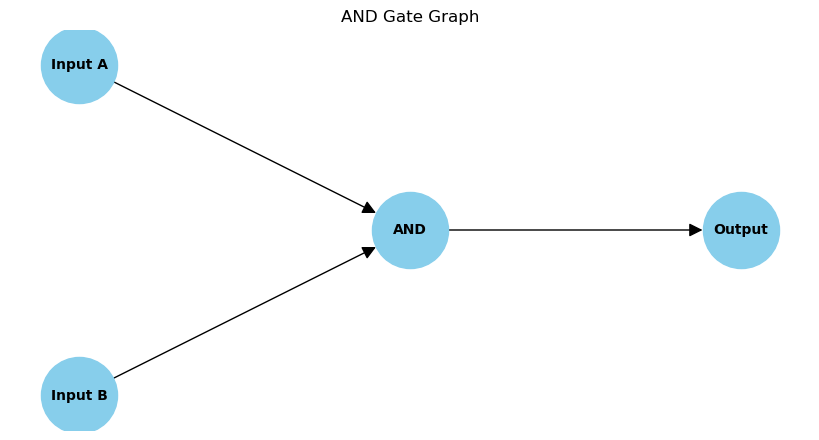

In [3]:
# Create a directed graph
AND_graph = nx.DiGraph()

AND_graph.add_edges_from([
    ('Input A', 'AND'), 
    ('Input B', 'AND'), 
    ('AND', 'Output')
])

pos = {
    'Input A': (0, 1),
    'Input B': (0, -1),
    'AND': (1, 0),
    'Output': (2, 0)
}

# Draw the graph
plt.figure(figsize=(8, 4))
nx.draw(
    AND_graph, pos, 
    with_labels=True, 
    node_size=3000, 
    node_color='skyblue', 
    font_size=10, 
    font_weight='bold', 
    arrowsize=20
)
plt.title("AND Gate Graph")
plt.show()

The code below loads the graph representing the RSA implementation. The exercise is to find the two nodes of the trojan: the detection node and the activation node.

In [4]:
# based on BasicRSA-T100 from trusthub
graph = read_dot("./07-SupplyChain/rsa_trojan.dot")